In [1]:
#import Func_Lib as func
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
plt.style.use('seaborn-white')
import time
import os
from glob import glob
import sys
import seaborn as sns
from decimal import Decimal

In [2]:
RCP=pd.read_csv('/cluster/tufts/lamontagnelab/gshabe01/sqcook_temp-trends_cmip5.csv')
RCP['RCP4.5 F']=RCP['rcp4.5']*9/5
RCP['RCP8.5 F']=RCP['rcp8.5']*9/5


In [3]:
RCP['RCP4.5_rolling']=RCP['rcp4.5'].rolling(10).mean().fillna(method='bfill')
RCP['RCP8.5_rolling']=RCP['rcp8.5'].rolling(10).mean().fillna(method='bfill')
RCP.head()

,year,Year,rcp4.5,rcp8.5,RCP4.5 F,RCP8.5 F,RCP4.5_rolling,RCP8.5_rolling
0,1/1/2006,2006,0.657916,0.801510,1.184249,1.442719,0.512596,0.717374
1,1/1/2007,2007,1.645037,0.772989,2.961066,1.391381,0.512596,0.717374
2,1/1/2008,2008,0.050608,0.773060,0.091094,1.391508,0.512596,0.717374
3,1/1/2009,2009,0.165518,1.204147,0.297932,2.167464,0.512596,0.717374
4,1/1/2010,2010,-0.089410,0.498086,-0.160937,0.896554,0.512596,0.717374


In [4]:
RCP.index=pd.to_datetime(RCP['year'])
RCP.head()

,year,Year,rcp4.5,rcp8.5,RCP4.5 F,RCP8.5 F,RCP4.5_rolling,RCP8.5_rolling
year,,,,,,,,
2006-01-01,1/1/2006,2006,0.657916,0.801510,1.184249,1.442719,0.512596,0.717374
2007-01-01,1/1/2007,2007,1.645037,0.772989,2.961066,1.391381,0.512596,0.717374
2008-01-01,1/1/2008,2008,0.050608,0.773060,0.091094,1.391508,0.512596,0.717374
2009-01-01,1/1/2009,2009,0.165518,1.204147,0.297932,2.167464,0.512596,0.717374
2010-01-01,1/1/2010,2010,-0.089410,0.498086,-0.160937,0.896554,0.512596,0.717374


In [5]:
RCP_decade=RCP.loc['2010-1-1':].resample('10y').mean()

In [6]:
RCP_decade.index = pd.to_datetime(RCP_decade.index)

RCP_decade['decade'] = RCP_decade.index.year
RCP_decade

,Year,rcp4.5,rcp8.5,RCP4.5 F,RCP8.5 F,RCP4.5_rolling,RCP8.5_rolling,decade
year,,,,,,,,
2010-12-31,2010.0,-0.089410,0.498086,-0.160937,0.896554,0.512596,0.717374,2010
2020-12-31,2015.5,0.568405,0.811761,1.023129,1.461170,0.510304,0.787072,2020
2030-12-31,2025.5,0.987332,1.190820,1.777198,2.143475,0.774818,1.039333,2030
2040-12-31,2035.5,1.604400,1.441236,2.887920,2.594224,1.277323,1.346521,2040
2050-12-31,2045.5,1.752617,1.782530,3.154711,3.208554,1.779367,1.552355,2050
2060-12-31,2055.5,1.740816,2.888546,3.133469,5.199383,1.748291,2.459989,2060
2070-12-31,2065.5,1.601859,2.956946,2.883345,5.322503,1.569942,2.879116,2070
2080-12-31,2075.5,1.885670,3.421098,3.394206,6.157977,1.757199,3.232902,2080
2090-12-31,2085.5,1.996106,3.495284,3.592991,6.291511,2.031726,3.395303,2090


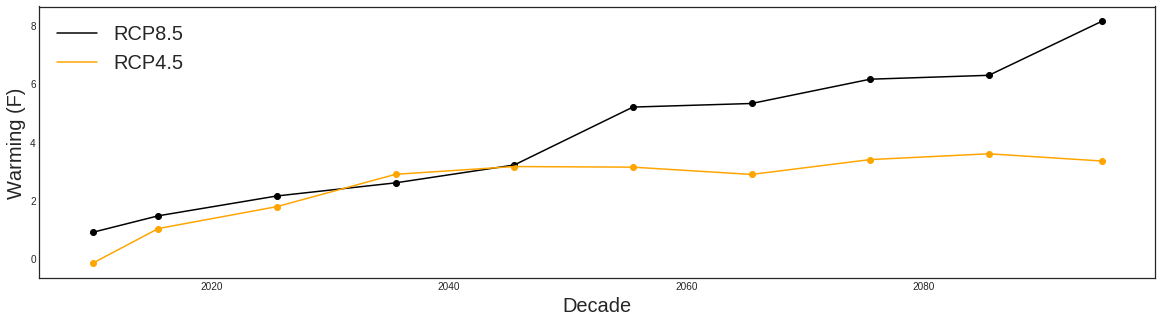

In [7]:
plt.figure(figsize=(20,5))
plt.plot(RCP_decade['Year'],RCP_decade['RCP8.5 F'], color='k',label='RCP8.5')
plt.scatter(np.array(RCP_decade['Year']),np.array(RCP_decade['RCP8.5 F']),color='k')


plt.plot(RCP_decade['Year'],RCP_decade['RCP4.5 F'], color='Orange',label='RCP4.5')
plt.scatter(np.array(RCP_decade['Year']),np.array(RCP_decade['RCP4.5 F']),color='orange')

plt.xlabel('Decade',fontsize=20)
plt.ylabel('Warming (F)',fontsize=20)
plt.legend(fontsize=20)

In [8]:
RCP_decade['RCP8.5_step']=round(RCP_decade['RCP8.5 F']*2)/2
RCP_decade['RCP4.5_step']=round(RCP_decade['RCP4.5 F']*2)/2

In [9]:
RCP=RCP_decade

In [10]:
RCP

,Year,rcp4.5,rcp8.5,RCP4.5 F,RCP8.5 F,RCP4.5_rolling,RCP8.5_rolling,decade,RCP8.5_step,RCP4.5_step
year,,,,,,,,,,
2010-12-31,2010.0,-0.089410,0.498086,-0.160937,0.896554,0.512596,0.717374,2010,1.0,-0.0
2020-12-31,2015.5,0.568405,0.811761,1.023129,1.461170,0.510304,0.787072,2020,1.5,1.0
2030-12-31,2025.5,0.987332,1.190820,1.777198,2.143475,0.774818,1.039333,2030,2.0,2.0
2040-12-31,2035.5,1.604400,1.441236,2.887920,2.594224,1.277323,1.346521,2040,2.5,3.0
2050-12-31,2045.5,1.752617,1.782530,3.154711,3.208554,1.779367,1.552355,2050,3.0,3.0
2060-12-31,2055.5,1.740816,2.888546,3.133469,5.199383,1.748291,2.459989,2060,5.0,3.0
2070-12-31,2065.5,1.601859,2.956946,2.883345,5.322503,1.569942,2.879116,2070,5.5,3.0
2080-12-31,2075.5,1.885670,3.421098,3.394206,6.157977,1.757199,3.232902,2080,6.0,3.5
2090-12-31,2085.5,1.996106,3.495284,3.592991,6.291511,2.031726,3.395303,2090,6.5,3.5


In [12]:
n=0
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood500_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q500test0=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q500test0[i]=np.array(test[i][0])
    
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood100_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q100test0=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q100test0[i]=np.array(test[i][0])

filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood50_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q50test0=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q50test0[i]=np.array(test[i][0])



In [23]:
(np.median(Q500test100)-np.median(Q500test0))/np.median(Q500test0)
(np.median(Q100test100)-np.median(Q100test0))/np.median(Q100test0)

0.14889049194077703

([<matplotlib.axis.YTick at 0x2b356f6267f0>,
 <a list of 5 Text yticklabel objects>)

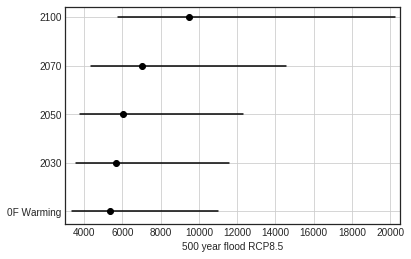

In [15]:
n=np.int(RCP_decade['RCP8.5_step'].loc['2070-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood500_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q500_70test85=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q500_70test85[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP8.5_step'].loc['2050-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood500_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q500_50test85=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q500_50test85[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP8.5_step'].loc['2030-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood500_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q500_30test85=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q500_30test85[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP8.5_step'].loc['2100-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood500_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q500_100test85=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q500_100test85[i]=np.array(test[i][0])
    
    

minQ500_100= np.percentile(Q500_100test85,5)
maxQ500_100=np.percentile(Q500_100test85,95)

minQ500_70= np.percentile(Q500_70test85,5)
maxQ500_70=np.percentile(Q500_70test85,95)

minQ500_50= np.percentile(Q500_50test85,5)
maxQ500_50=np.percentile(Q500_50test85,95)

minQ500_30= np.percentile(Q500_30test85,5)
maxQ500_30=np.percentile(Q500_30test85,95)

minQ500_0= np.percentile(Q500test0,5)
maxQ500_0=np.percentile(Q500test0,95)

plt.figure()

plt.plot([minQ500_100,maxQ500_100],[5,5],color='k')
plt.scatter(np.median(Q500_100test85), 5,color='k')
plt.plot([minQ500_70,maxQ500_70],[4,4],color='k')
plt.scatter(np.median(Q500_70test85), 4,color='k')
plt.plot([minQ500_50,maxQ500_50],[3,3],color='k')
plt.scatter(np.median(Q500_50test85), 3,color='k')
plt.plot([minQ500_30,maxQ500_30],[2,2],color='k')
plt.scatter(np.median(Q500_30test85), 2,color='k')

#plt.scatter(5577.48,1,color='k')

#plt.plot([3128,11858],[1,1],color='k')

plt.plot([minQ500_0,maxQ500_0],[1,1],color='k')
plt.scatter(np.median(Q500test0), 1,color='k')


plt.grid()
plt.xticks([4000,6000,8000,10000,12000,14000,16000,18000,20000])
plt.xlim(3000,20500)
plt.xlabel('500 year flood RCP8.5')
plt.yticks([1,2,3,4,5],['0F Warming','2030','2050','2070', '2100'])
#plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/500flood2070s.svg',bbox_inches='tight')

([<matplotlib.axis.YTick at 0x2b356d5370b8>,
 <a list of 5 Text yticklabel objects>)

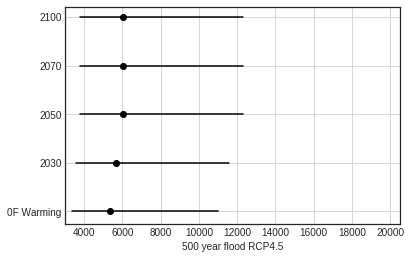

In [19]:
n=np.int(RCP_decade['RCP4.5_step'].loc['2070-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood500_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q500_70test85=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q500_70test85[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP4.5_step'].loc['2050-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood500_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q500_50test85=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q500_50test85[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP4.5_step'].loc['2030-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood500_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q500_30test85=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q500_30test85[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP4.5_step'].loc['2100-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood500_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q500_100test85=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q500_100test85[i]=np.array(test[i][0])
    
    

minQ500_100= np.percentile(Q500_100test85,5)
maxQ500_100=np.percentile(Q500_100test85,95)

minQ500_70= np.percentile(Q500_70test85,5)
maxQ500_70=np.percentile(Q500_70test85,95)

minQ500_50= np.percentile(Q500_50test85,5)
maxQ500_50=np.percentile(Q500_50test85,95)

minQ500_30= np.percentile(Q500_30test85,5)
maxQ500_30=np.percentile(Q500_30test85,95)

minQ500_0= np.percentile(Q500test0,5)
maxQ500_0=np.percentile(Q500test0,95)

plt.figure()

plt.plot([minQ500_100,maxQ500_100],[5,5],color='k')
plt.scatter(np.median(Q500_100test85), 5,color='k')
plt.plot([minQ500_70,maxQ500_70],[4,4],color='k')
plt.scatter(np.median(Q500_70test85), 4,color='k')
plt.plot([minQ500_50,maxQ500_50],[3,3],color='k')
plt.scatter(np.median(Q500_50test85), 3,color='k')
plt.plot([minQ500_30,maxQ500_30],[2,2],color='k')
plt.scatter(np.median(Q500_30test85), 2,color='k')

#plt.scatter(5577.48,1,color='k')

#plt.plot([3128,11858],[1,1],color='k')

plt.plot([minQ500_0,maxQ500_0],[1,1],color='k')
plt.scatter(np.median(Q500test0), 1,color='k')


plt.grid()
plt.xticks([4000,6000,8000,10000,12000,14000,16000,18000,20000])
plt.xlim(3000,20500)
plt.xlabel('500 year flood RCP4.5')
plt.yticks([1,2,3,4,5],['0F Warming','2030','2050','2070', '2100'])
#plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/500flood2070s.svg',bbox_inches='tight')

([<matplotlib.axis.YTick at 0x2b356d4a75c0>,
 <a list of 5 Text yticklabel objects>)

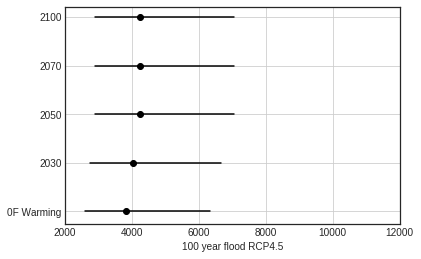

In [17]:
n=np.int(RCP_decade['RCP4.5_step'].loc['2070-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood100_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q100_70test45=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q100_70test45[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP4.5_step'].loc['2050-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood100_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q100_50test45=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q100_50test45[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP4.5_step'].loc['2030-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood100_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q100_30test45=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q100_30test45[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP4.5_step'].loc['2100-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood100_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q100_100test45=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q100_100test45[i]=np.array(test[i][0])
    
    

minQ100_100= np.percentile(Q100_100test45,5)
maxQ100_100=np.percentile(Q100_100test45,95)

minQ100_70= np.percentile(Q100_70test45,5)
maxQ100_70=np.percentile(Q100_70test45,95)

minQ100_50= np.percentile(Q100_50test45,5)
maxQ100_50=np.percentile(Q100_50test45,95)

minQ100_30= np.percentile(Q100_30test45,5)
maxQ100_30=np.percentile(Q100_30test45,95)
minQ100_0=np.percentile(Q100test0,5)
maxQ100_0=np.percentile(Q100test0,95)
plt.figure()

plt.plot([minQ100_100,maxQ100_100],[5,5],color='k')
plt.scatter(np.median(Q100_100test45), 5,color='k')
plt.plot([minQ100_70,maxQ100_70],[4,4],color='k')
plt.scatter(np.median(Q100_70test45), 4,color='k')
plt.plot([minQ100_50,maxQ100_50],[3,3],color='k')
plt.scatter(np.median(Q100_50test45), 3,color='k')
plt.plot([minQ100_30,maxQ100_30],[2,2],color='k')
plt.scatter(np.median(Q100_30test45), 2,color='k')

#plt.scatter(3525.45,1,color='k')

#plt.plot([2622,5142],[1,1],color='k')



plt.plot([minQ100_0,maxQ100_0],[1,1],color='k')
plt.scatter(np.median(Q100test0), 1,color='k')

plt.xticks([2000,4000,6000,8000,10000,12000])

plt.grid()
plt.xlim(2000,12000)
plt.xlabel('100 year flood RCP4.5')
plt.yticks([1,2,3,4,5],['0F Warming','2030','2050','2070', '2100'])

([<matplotlib.axis.YTick at 0x2b356d488470>,
 <a list of 5 Text yticklabel objects>)

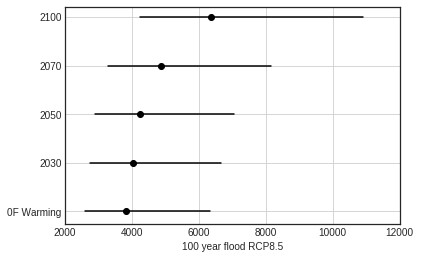

In [20]:
n=np.int(RCP_decade['RCP8.5_step'].loc['2070-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood100_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q100_70test45=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q100_70test45[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP8.5_step'].loc['2050-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood100_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q100_50test45=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q100_50test45[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP8.5_step'].loc['2030-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood100_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q100_30test45=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q100_30test45[i]=np.array(test[i][0])

n=np.int(RCP_decade['RCP8.5_step'].loc['2100-12-31'])
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/flood100_*.csv' %n)
test=([pd.read_csv(f,header=None) for f in filename])
Q100_100test45=pd.DataFrame(np.zeros((len(test[1]),100)))
for i in range(0,len(test)-1):
    Q100_100test45[i]=np.array(test[i][0])
    
    

minQ100_100= np.percentile(Q100_100test45,5)
maxQ100_100=np.percentile(Q100_100test45,95)

minQ100_70= np.percentile(Q100_70test45,5)
maxQ100_70=np.percentile(Q100_70test45,95)

minQ100_50= np.percentile(Q100_50test45,5)
maxQ100_50=np.percentile(Q100_50test45,95)

minQ100_30= np.percentile(Q100_30test45,5)
maxQ100_30=np.percentile(Q100_30test45,95)
minQ100_0=np.percentile(Q100test0,5)
maxQ100_0=np.percentile(Q100test0,95)
plt.figure()

plt.plot([minQ100_100,maxQ100_100],[5,5],color='k')
plt.scatter(np.median(Q100_100test45), 5,color='k')
plt.plot([minQ100_70,maxQ100_70],[4,4],color='k')
plt.scatter(np.median(Q100_70test45), 4,color='k')
plt.plot([minQ100_50,maxQ100_50],[3,3],color='k')
plt.scatter(np.median(Q100_50test45), 3,color='k')
plt.plot([minQ100_30,maxQ100_30],[2,2],color='k')
plt.scatter(np.median(Q100_30test45), 2,color='k')

#plt.scatter(3525.45,1,color='k')

#plt.plot([2622,5142],[1,1],color='k')



plt.plot([minQ100_0,maxQ100_0],[1,1],color='k')
plt.scatter(np.median(Q100test0), 1,color='k')

plt.xticks([2000,4000,6000,8000,10000,12000])

plt.grid()
plt.xlim(2000,12000)
plt.xlabel('100 year flood RCP8.5')
plt.yticks([1,2,3,4,5],['0F Warming','2030','2050','2070', '2100'])

In [23]:
import decimal
n=decimal.Decimal(RCP_decade['RCP4.5_step'].loc['2070-12-31']).normalize()
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest=pd.DataFrame(np.zeros((10000,100)))
for i in range(0,len(test)):
    Qtest[i]=np.array(test[i,:])
    
    
n=decimal.Decimal(RCP_decade['RCP4.5_step'].loc['2050-12-31']).normalize()
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest50=pd.DataFrame(np.zeros((10000,100)))
for i in range(0,len(test)):
    Qtest50[i]=np.array(test[i,:])
    
n=decimal.Decimal(RCP_decade['RCP4.5_step'].loc['2030-12-31']).normalize()
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest30=pd.DataFrame(np.zeros((10000,100)))
for i in range(0,len(test)):
    Qtest30[i]=np.array(test[i,:])
    
n=decimal.Decimal(RCP_decade['RCP4.5_step'].loc['2100-12-31']).normalize()
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest100=pd.DataFrame(np.zeros((10000,100)))
for i in range(0,len(test)):
    Qtest100[i]=np.array(test[i,:])
    
n=0
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_med*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest0=pd.DataFrame(np.zeros((10000,99)))
for i in range(0,len(test)):
    Qtest0[i]=np.array(test[i,:])

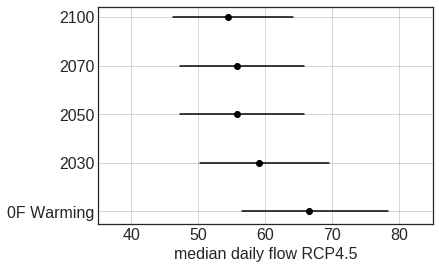

In [24]:
minQ_100= np.percentile(Qtest100,5)
maxQ_100=np.percentile(Qtest100,95)

minQ_70= np.percentile(Qtest,5)
maxQ_70=np.percentile(Qtest,95)

minQ_50= np.percentile(Qtest50,5)
maxQ_50=np.percentile(Qtest50,95)

minQ_30= np.percentile(Qtest30,5)
maxQ_30=np.percentile(Qtest30,95)

minQ_0= np.percentile(Qtest0,5)
maxQ_0=np.percentile(Qtest0,95)

plt.figure()

plt.plot([minQ_100,maxQ_100],[5,5],color='k')
plt.scatter(np.median(Qtest100), 5,color='k')
plt.plot([minQ_70,maxQ_70],[4,4],color='k')
plt.scatter(np.median(Qtest), 4,color='k')
plt.plot([minQ_50,maxQ_50],[3,3],color='k')
plt.scatter(np.median(Qtest50), 3,color='k')
plt.plot([minQ_30,maxQ_30],[2,2],color='k')
plt.scatter(np.median(Qtest30), 2,color='k')

#plt.scatter(5577.48,1,color='k')

#plt.plot([3128,11858],[1,1],color='k')

plt.plot([minQ_0,maxQ_0],[1,1],color='k')
plt.scatter(np.median(Qtest0), 1,color='k')


plt.grid()
plt.xticks([40,50,60,70,80],size=16)
plt.xlim(35,85)
plt.xlabel('median daily flow RCP4.5',size=16)
plt.yticks([1,2,3,4,5],['0F Warming','2030','2050','2070', '2100'],size=16)
plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/medianflow_RCP45.png',bbox_inches='tight',dpi=500)

plt.show()
#plt.savefig('/cluster/tufts/lamontagnelab/gshabe01/500flood2070s.svg',bbox_inches='tight')

In [25]:
import decimal
n=decimal.Decimal(RCP_decade['RCP8.5_step'].loc['2070-12-31']).normalize()
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest=pd.DataFrame(np.zeros((10000,100)))
for i in range(0,len(test)):
    Qtest[i]=np.array(test[i,:])
    
    
n=decimal.Decimal(RCP_decade['RCP8.5_step'].loc['2050-12-31']).normalize()
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest50=pd.DataFrame(np.zeros((10000,100)))
for i in range(0,len(test)):
    Qtest50[i]=np.array(test[i,:])
    
n=decimal.Decimal(RCP_decade['RCP8.5_step'].loc['2030-12-31']).normalize()
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest30=pd.DataFrame(np.zeros((10000,100)))
for i in range(0,len(test)):
    Qtest30[i]=np.array(test[i,:])
    
n=decimal.Decimal(RCP_decade['RCP8.5_step'].loc['2100-12-31']).normalize()
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest100=pd.DataFrame(np.zeros((10000,100)))
for i in range(0,len(test)):
    Qtest100[i]=np.array(test[i,:])
    
n=0
filename=glob('/cluster/tufts/lamontagnelab/gshabe01/outfiles/deg%s/daily_med*.npy' %n)
test=np.array([np.load(f) for f in filename])
Qtest0=pd.DataFrame(np.zeros((10000,99)))
for i in range(0,len(test)):
    Qtest0[i]=np.array(test[i,:])

In [29]:
(np.median(Q100_100test85)-np.median(Q100test0))/np.median(Q100test0)

0.671856505303688